Many statistical tools and techniques used in data analysis are based on probability. Probability measures how likely for an event to occur on scale on 0 (An event not occuring) and 1 (An event occuring). When with data, variables in the columns of the data set can be thought as a random variable: variables that vary due to chance. A [Probability Distribution](https://www.scribbr.com/statistics/probability-distributions/#:~:text=Revised%20on%20June%2021%2C%202023,using%20graphs%20or%20probability%20tables.) describes how a random variable is distributed; It tells us which values are a random variable is most like to take on and which values are less likely.


In statistics there are a range of precisely defined probability distribution that have different shapes and can be used to model different types of random events. In this lesson we will discuss some common probability distributions and how to work with them in python

## The Uniform Distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) is a probability distribution where each value within a certain range is equally likely to occur and values outside that range never occurs. If we make a density plot of a uniform distribution, it appears flat because no value is more likely than the other.

---

Many useful functions for working with probabilty distribution in python is contained with the ```scipy.stats``` library.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
uniform_data = stats.uniform.rvs(size=100000,
                                loc=0,
                                scale=10)

<Axes: ylabel='Density'>

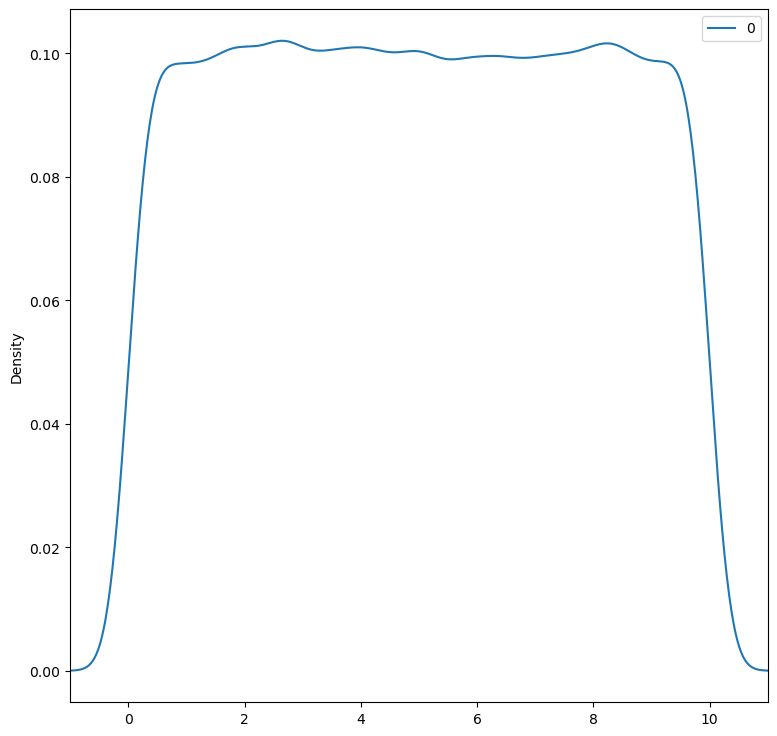

In [4]:
pd.DataFrame(uniform_data).plot(kind="density",
                               figsize=(9,9),
                               xlim=(-1,11))

**Note** the plot above is an approximation of the underlying distribution, since it is based on a sample of observations,


In the code above, we generated 100,000 data points from a uniform distribution spanning the range 0 - 10. In the density plot, we see that the density of our uniform data is essentially level meaning any given value has the same probability of occuring. The area under probability density curve is a always equal to 1.


Probability distribution in scipy come with several useful functions for generating random data and extracting values of interest.


```stats.distribution.rvs``` generates random numbers from the specified distribution. The argument to ***rvs()*** will vary depending on the type of distribution you are working with; In the case of uniform distribution, we have to specify the starting and ending points and the size(number of random points to generate).


```stats.distribution``` is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function).  In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x-axis. For example, In the uniform distribution above, there is a 25% chance that an observation will be change in the range 0 to 2.5 and a 75% chance it will in the range 2.5 to 10. we can confirm this with cdf()

In [5]:
stats.uniform.cdf(x = 2.5,
                  loc=0,
                  scale=10
                 )

0.25

```stats.distribution.ppf``` is the inverse of ***cdf()***; It returns the x-axis cutoff value(quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance for drawing an observation below that value, we can use ppf();

In [6]:
stats.uniform.ppf(q=0.4,
                  loc=0,
                  scale=10
                    )

4.0

```stats.distribution.pdf()``` gives you the probabbility density at a given x value, since the uniform distribution is flat, all x values within the range will have the same probability density and x values outside the range will have a probility density of 0

In [7]:
for x in range(-1, 12, 3):
    print(f"Density at x value {x}")
    print(stats.uniform.pdf(x, loc=0, scale=10))

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


**Probability distribution functions in scipy also support median(), mean(), var() and std()**.

## Generating Random Numbers and Setting The Seed

When you need to generate random real numbers in a range with equal probability you can draw numbers from a uniform distribution using stats.distribution.rvs(). Python also comes with a library called ```random``` that lets you perform various operations that involve randomization. Let's look at a few functions in the random library;

In [10]:
import random

random.randint(0, 10)

6

In [11]:
random.choice([2,4,6,9])

4

In [13]:
random.random()

0.17740033083940798

In [14]:
random.uniform(0, 10)

4.651972376273879

Notice that the random library also lets you generate random uniform numbers, Regardless of the method you use to generate random numbers, however, the results of a random process can differ from one run to the next. Having results vary each time you run a function is often no desirable. For example, If you want a colleague to be able to reproduce your results exactly, you can run into problems when you see randomization. you can ensure that your results are the same each time you see a function that involves randomness by setting the random number generator's seed value to initialize it prior to running the fucntion. Set the random seed with random.seed().